In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Load the data
data = pd.read_csv('data/API_EN.ATM.CO2E.PC_DS2_en_csv_v2_5995557.csv', skiprows=4)

In [2]:
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,1.013758,0.960430,0.941337,0.933874,0.921453,0.915294,0.795420,NaN,NaN,NaN
2,Afghanistan,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,0.283692,0.297972,0.268359,0.281196,0.299083,0.297564,0.223479,NaN,NaN,NaN
3,Africa Western and Central,AFW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,0.493505,0.475577,0.479775,0.465166,0.475817,0.490837,0.463150,NaN,NaN,NaN
4,Angola,AGO,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,1.091497,1.125185,1.012552,0.829723,0.755828,0.753638,0.592743,NaN,NaN,NaN


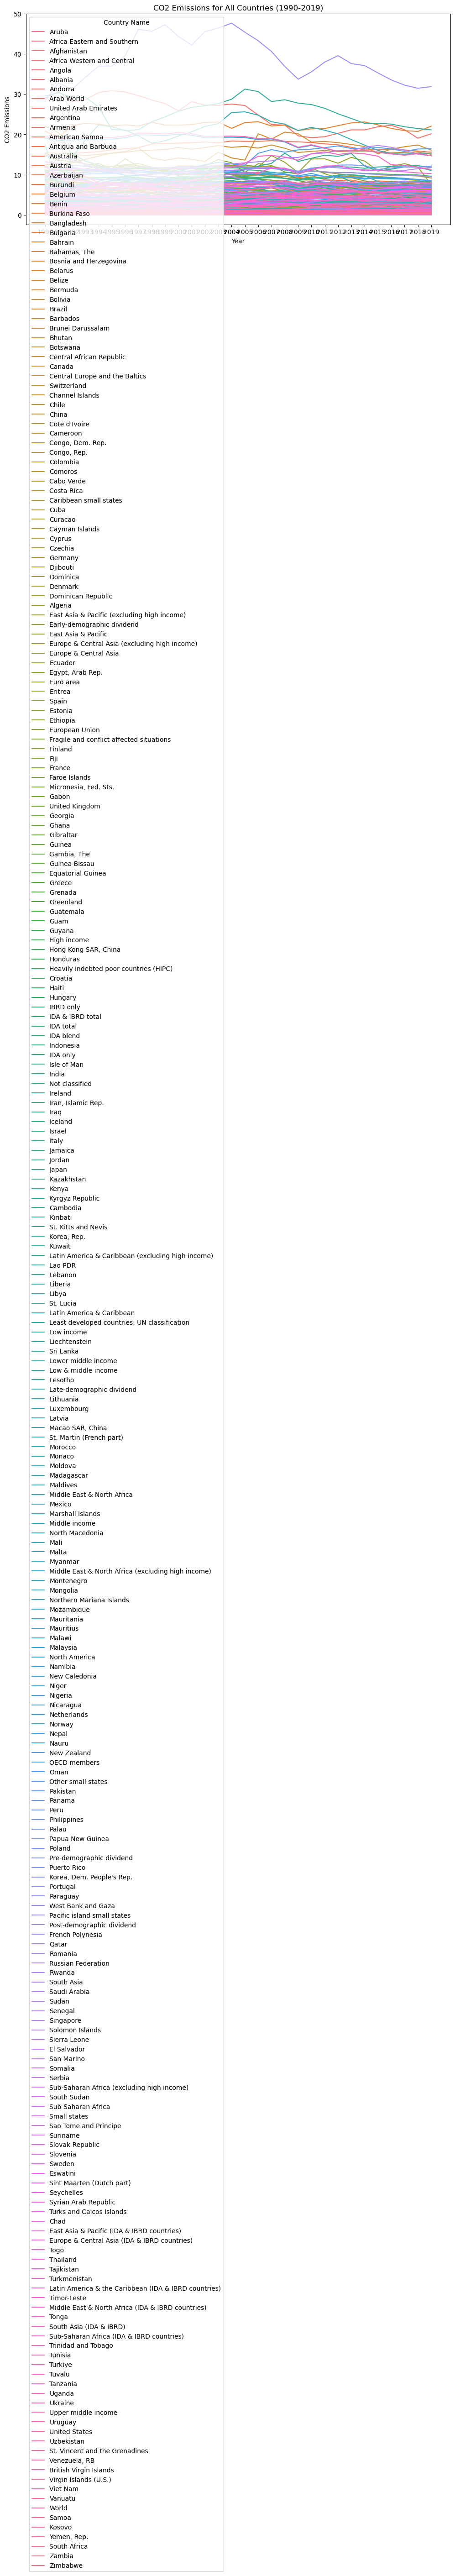

In [3]:
# Reshape the data
years = [str(i) for i in range(1990, 2020)]
reshaped_data = data.melt(id_vars=["Country Name", "Country Code"], value_vars=years, var_name="Year", value_name="CO2 Emissions")
# Create a line chart for all countries
plt.figure(figsize=(12, 6))
sns.lineplot(data=reshaped_data, x="Year", y="CO2 Emissions", hue="Country Name")
plt.title("CO2 Emissions for All Countries (1990-2019)")
plt.show()

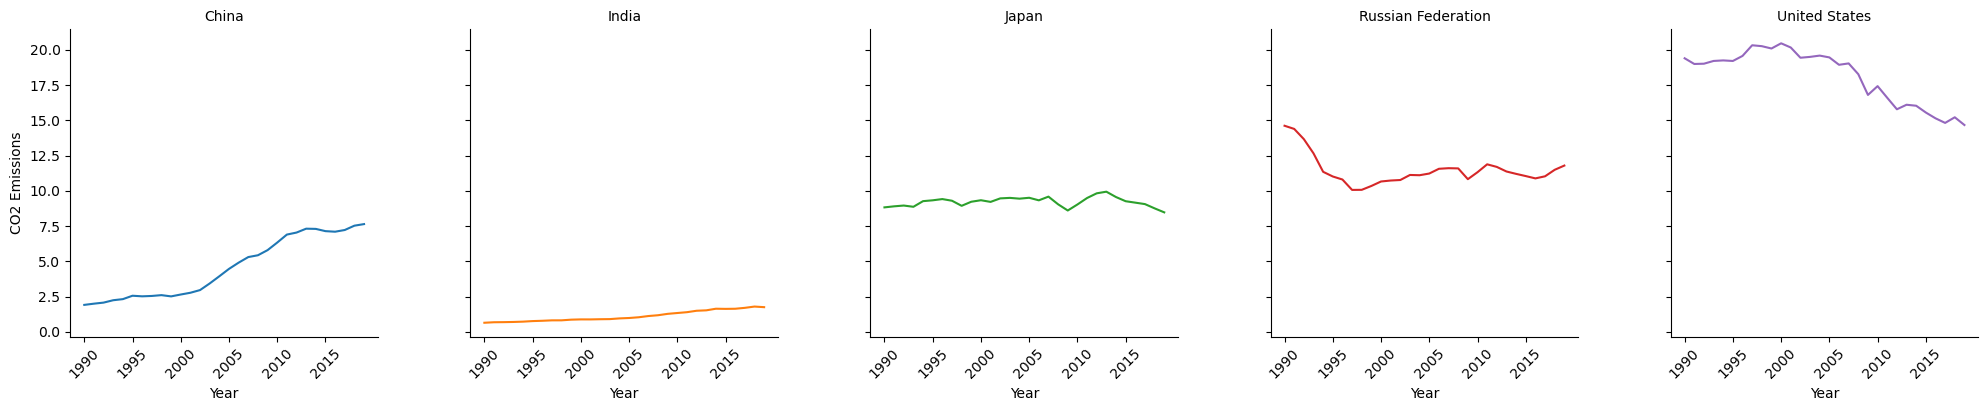

In [4]:
# Filter the data
top_countries = ["China", "United States", "India", "Russian Federation", "Japan"]
filtered_data = data[data["Country Name"].isin(top_countries)]

# Reshape the data
reshaped_data = filtered_data.melt(id_vars=["Country Name", "Country Code"], value_vars=years, var_name="Year", value_name="CO2 Emissions")

# Create small multiples of line charts
g = sns.FacetGrid(reshaped_data, col="Country Name", hue="Country Name", height=4, aspect=1)
g.map(sns.lineplot, "Year", "CO2 Emissions")

# Rotate the x-axis labels for better readability
g.set_xticklabels(rotation=45)

# Adjust the x-axis ticks to display every 10 years
g.set(xticks=[i for i, year in enumerate(years) if int(year) % 5 == 0], xticklabels=[year for year in years if int(year) % 5 == 0])

# Add a title for each subplot
g.set_titles(col_template="{col_name}")

# Adjust the space between the subplots
g.fig.subplots_adjust(wspace=.3)
# Show the plot
plt.show()

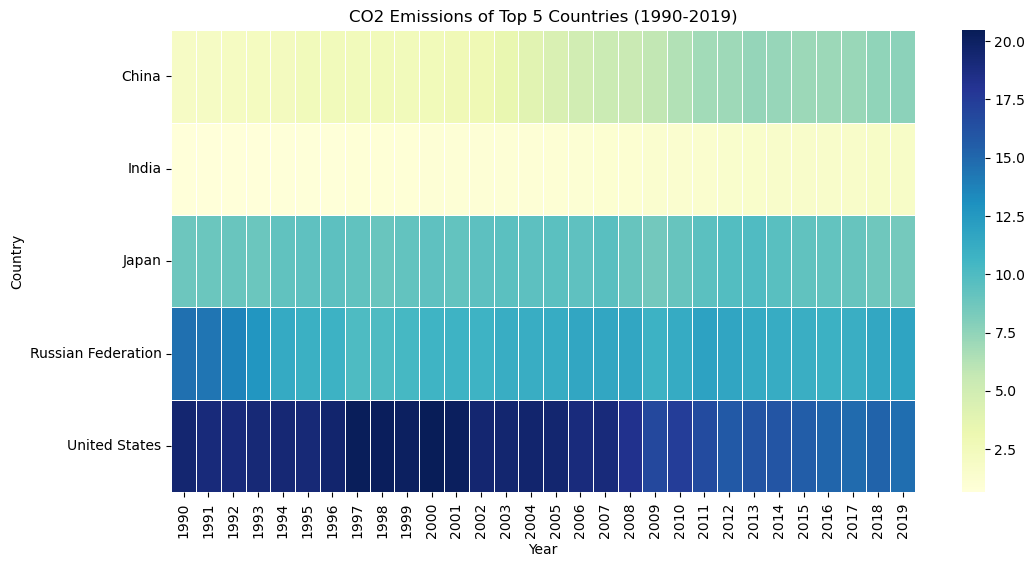

In [5]:
# Create a pivot table for the heatmap
heatmap_data = reshaped_data.pivot_table(index="Country Name", columns="Year", values="CO2 Emissions")

# Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=0.5)
plt.title("CO2 Emissions of Top 5 Countries (1990-2019)")
plt.xlabel("Year")
plt.ylabel("Country")
plt.show()

<Figure size 1200x600 with 0 Axes>

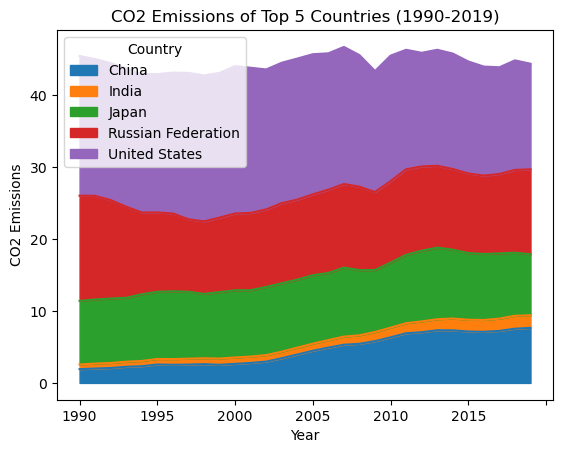

In [6]:
# Create a DataFrame with years as columns
stacked_data = filtered_data.set_index("Country Name").loc[:, years].transpose()
# Create the stacked area chart
plt.figure(figsize=(12, 6))
stacked_data.plot.area()
plt.title("CO2 Emissions of Top 5 Countries (1990-2019)")
plt.xlabel("Year")
plt.ylabel("CO2 Emissions")
plt.legend(title="Country")
plt.show()